In [1]:
!pwd

/opt/lessons/python-exp/notebooks


In [ ]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [1]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [2]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

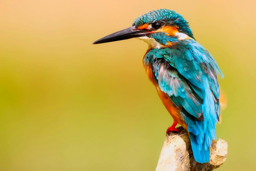

In [3]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [17]:
furls=search_images('forest photos', max_images=10)
furls[1]

'https://images.pexels.com/photos/1125776/pexels-photo-1125776.jpeg?cs=srgb&dl=forest-grass-green-1125776.jpg&fm=jpg'

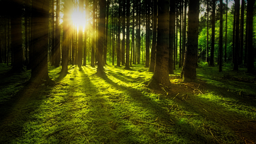

In [18]:
fdest='forest.jpg'
download_url(furls[1], fdest, show_progress=False)
Image.open(fdest).to_thumb(256,256)

In [19]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [20]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

22

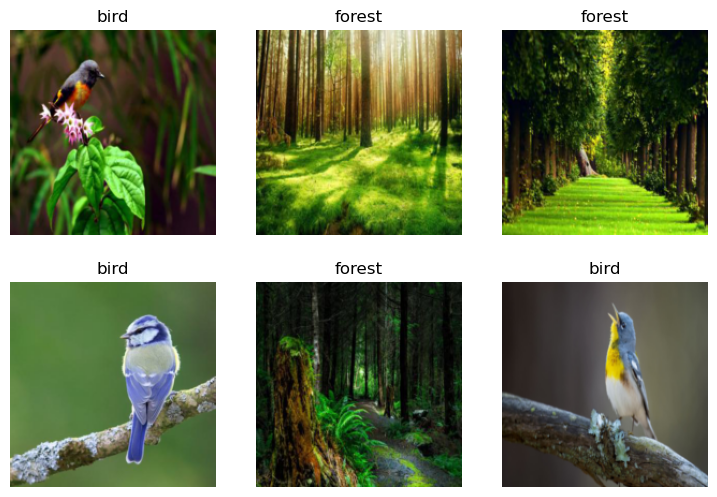

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.664211,0.289940,0.060606,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.076253,0.003702,0.000000,00:03
1,0.064843,0.000893,0.000000,00:03
2,0.041150,0.001302,0.000000,00:03


In [26]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [34]:
is_forest,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_forest}.")
print(f"Probability it's a forest: {probs[1]:.4f}")

This is a: forest.
Probability it's a forest: 1.0000
